In [150]:
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt

### From Darksky

In [69]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
import time

In [57]:
# Instantiate chrome environment
driver = webdriver.Chrome(ChromeDriverManager().install())

# Go to this caiso page
driver.get('https://darksky.net/details/35.5912,-115.427/2020-7-2/us12/en')

[WDM] - Cache is valid for [01/06/2020]
[WDM] - Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/Sam/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]


In [108]:
# Instantiate chrome environment
driver = webdriver.Chrome(ChromeDriverManager().install())

# Go to this caiso page
driver.get('https://darksky.net/details/35.5912,-115.427/2020-7-2/us12/en')

sl = driver.find_element_by_xpath('//div[@id="slider"]')
move = ActionChains(driver)

move.click_and_hold(sl).move_by_offset(-400, 0).release().perform()
time.sleep(2)

move.click_and_hold(sl).move_by_offset(-350, 0).release().perform()
time.sleep(2)

move.click_and_hold(sl).move_by_offset(-300+66.666, 0).release().perform()
time.sleep(2)

move.click_and_hold(sl).move_by_offset(-250, 0).release().perform()
time.sleep(2)

[WDM] - Cache is valid for [01/06/2020]
[WDM] - Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/Sam/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]


In [111]:
driver = webdriver.Chrome(ChromeDriverManager().install())
# Go to this caiso page
driver.get('https://darksky.net/details/35.5912,-115.427/2020-7-2/us12/en')
slider = driver.find_element_by_xpath("//div[@class = 'handle']")

for hour in np.round(np.linspace(0,800,24),3):
    driver.execute_script(f"arguments[0].setAttribute('style','left: {str(hour)}px;')", slider)
    deets = driver.find_element_by_xpath('//div[@class="uv_index"]')
    print(str(hour))
    print(deets.text)
    del deets
    time.sleep(2)

[WDM] - Cache is valid for [01/06/2020]
[WDM] - Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/Sam/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]


 
0.0
UV Index: 11


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//div[@class="uv_index"]"}
  (Session info: chrome=83.0.4103.61)


### Find UV

In [137]:
# Instantiate chrome environment
driver = webdriver.Chrome(ChromeDriverManager().install())

# Go to this caiso page
driver.get('https://darksky.net/details/35.5912,-115.427/2020-7-2/us12/en')

#uv = driver.find_element_by_xpath('//div[@class="uv_index"]')
#nums = driver.find_element_by_xpath('//span[@class="num"]/*')

nums = driver.find_elements_by_class_name('num')

[WDM] - Cache is valid for [01/06/2020]
[WDM] - Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/Sam/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]


In [147]:
nums[3].text

'10'

In [135]:
#uv.text
nums.text

'95'

In [128]:
ticks = [
    '@class="even first" and @style="left: 0px;"',
    '@class="odd second" and @style="left: 33.3333px;"',
    '@class="even" and @style="left: 66.6667px;"',
    '@class="odd" and @style="left: 100px;"',
    '@class="even" and @style="left: 133.333px;"',
    '@class="odd" and @style="left: 166.667px;"',
    '@class="even" and @style="left: 200px;"',
    '@class="odd" and @style="left: 233.333px;"',
    '@class="even" and @style="left: 266.667px;"',
    '@class="odd" and @style="left: 300px;"',
    '@class="even" and @style="left: 333.333px;"',
    '@class="odd" and @style="left: 366.667px;"',
    '@class="even" and @style="left: 400px;"',
    '@class="odd" and @style="left: 433.333px;"',
    '@class="even" and @style="left: 466.667px;"',
    '@class="odd" and @style="left: 500px;"',
    '@class="even" and @style="left: 533.333px;"',
    '@class="odd" and @style="left: 566.667px;"',
    '@class="even" and @style="left: 600px;"',
    '@class="odd" and @style="left: 633.333px;"',
    '@class="even" and @style="left: 666.667px;"',
    '@class="odd" and @style="left: 700px;"',
    '@class="even" and @style="left: 733.333px;"',
    '@class="odd" and @style="left: 766.667px;"',
]

In [148]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://darksky.net/details/35.5912,-115.427/2020-7-2/us12/en')

wind = []
uv = []

for tick in ticks:
    hour = driver.find_element_by_xpath(f'//span[{tick}]')
    ActionChains(driver).move_to_element(hour).click(hour).perform()
    time.sleep(1)
    nums = driver.find_elements_by_class_name('num')
    wind.append(int(nums[3].text))
    uv.append(int(nums[7].text))

[WDM] - Cache is valid for [01/06/2020]
[WDM] - Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/Sam/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]


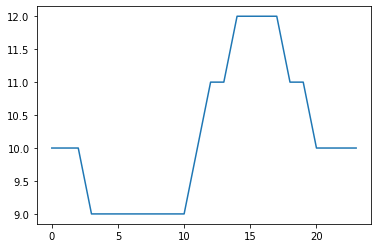

In [152]:
plt.plot(wind)

In [121]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://darksky.net/details/35.5912,-115.427/2020-7-2/us12/en')
hour = driver.find_element_by_xpath('//span[@class="odd second" and @style="left: 33.3333px;"]')
ActionChains(driver).move_to_element(hour).click(hour).perform()
deets = driver.find_element_by_xpath('//div[@class="uv_index"]')
print(deets.text)

[WDM] - Cache is valid for [01/06/2020]
[WDM] - Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/Sam/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//div[@class="uv_index"]"}
  (Session info: chrome=83.0.4103.61)


In [ ]:
driver = webdriver.Chrome(ChromeDriverManager().install())

deets = driver.find_element_by_xpath('//div[@id="currentDetails"]')
menu = driver.find_element_by_css_selector(".nav")
hidden_submenu = driver.find_element_by_css_selector(".nav #submenu1")

ActionChains(driver).move_to_element(menu).click(hidden_submenu).perform()




In [52]:
try:
    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get("http://99.243.40.11/#/HouseSold")
    
    en =  driver.find_element_by_xpath("//span[6]")
    
    move = ActionChains(driver)
    move.click_and_hold(en).move_by_offset(10, 0).release().perform()
    time.sleep(5)

    move.click_and_hold(en).move_by_offset(10, 0).release().perform()
    time.sleep(5)

    move.click_and_hold(en).move_by_offset(10, 0).release().perform()
    time.sleep(5)

finally:
    driver.close()

[WDM] - Cache is valid for [01/06/2020]
[WDM] - Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
[WDM] - Driver found in cache [/Users/Sam/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=83.0.4103.61)


### Historical data from meteostat

In [14]:
key = '12j7qQO3'
lat = '35.376175'
lon = '-120.061942'

### Get weather stations near SLO solar field

In [21]:
url = f"https://api.meteostat.net/v1/stations/nearby?lat={lat}&lon={lon}&limit=5&key={key}"
url = f"https://api.meteostat.net/v1/history/daily?station={station}&start={start_date}&end=2{end_date}&key={key}"

In [22]:
res = requests.get(url)

In [23]:
res.status_code

200

In [28]:
test = res.json()

In [31]:
test['data']

[{'id': 'KSBP0',
  'name': 'San Luis Obispo / Steele (Historical)',
  'distance': '34.1'},
 {'id': 'KL520', 'name': 'Oceano / Oceano Beach', 'distance': '36.9'},
 {'id': 'KPRB0', 'name': 'Paso Robles / Estrella', 'distance': '37.8'},
 {'id': '72394', 'name': 'Santa Maria Public Airport', 'distance': '40.1'}]

### Collect daily weather for closest site

In [32]:
url2 = 'https://api.meteostat.net/v1/history/daily?station=KSBP0&start=2017-01-01&end=2017-12-31&key=12j7qQO3'

In [33]:
res2 = requests.get(url2)

In [34]:
res2.status_code

200

In [35]:
data = res2.json()

In [36]:
data.keys()

dict_keys(['meta', 'data'])

In [38]:
#print data
data['data'][0]

{'date': '2017-01-01',
 'temperature': 8.5,
 'temperature_min': 2.8,
 'temperature_max': 12.8,
 'precipitation': 0,
 'snowfall': None,
 'snowdepth': None,
 'winddirection': None,
 'windspeed': 7.2,
 'peakgust': None,
 'sunshine': None,
 'pressure': 1015.1}

### Hourly data

In [39]:
url3 = f"https://api.meteostat.net/v1/history/hourly?station={station}&start={start_date}&end={end_date}&time_zone=Europe/London&time_format=Y-m-d%20H:i&key={key}"

res3 = requests.get(url3)

In [40]:
res3.status_code

200

In [41]:
hrly = res3.json()

In [44]:
hrly['data']

[{'time': '2019-05-01 23:00:00',
  'time_local': '2019-05-02 00:00',
  'temperature': 18.9,
  'dewpoint': 9.4,
  'humidity': 54,
  'precipitation': 0,
  'precipitation_3': None,
  'precipitation_6': None,
  'snowdepth': None,
  'windspeed': 27.7,
  'peakgust': None,
  'winddirection': 330,
  'pressure': 1015.1,
  'condition': None},
 {'time': '2019-05-02 00:00:00',
  'time_local': '2019-05-02 01:00',
  'temperature': 18.3,
  'dewpoint': 9.9,
  'humidity': 58,
  'precipitation': 0,
  'precipitation_3': None,
  'precipitation_6': None,
  'snowdepth': None,
  'windspeed': 24.1,
  'peakgust': None,
  'winddirection': 300,
  'pressure': 1014.9,
  'condition': None},
 {'time': '2019-05-02 01:00:00',
  'time_local': '2019-05-02 02:00',
  'temperature': 17.2,
  'dewpoint': 10.1,
  'humidity': 63,
  'precipitation': 0,
  'precipitation_3': None,
  'precipitation_6': None,
  'snowdepth': None,
  'windspeed': 20.5,
  'peakgust': None,
  'winddirection': 310,
  'pressure': 1014.7,
  'condition': N